In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('Chinese database.csv') 
df

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 71,Attribute 72,Attribute 73,Attribute 74,Attribute 75,Attribute 76,Attribute 77,Attribute 78,Attribute 79,Y
0,0.328470,0.621909,0.681941,0.077886,0.000000,0.466059,1.0,1.000000,0.031412,0.894724,...,0.2,0.0,0.0,0.626321,0.239027,0.356067,0.97561,0.182182,0.650655,1
1,0.000000,0.000000,0.681941,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.2,0.0,0.0,0.694637,0.239027,0.356067,0.97561,0.182182,0.650655,0
2,0.325102,0.517464,0.000000,0.059524,0.000000,0.467174,1.0,0.641464,0.070322,0.587853,...,1.0,0.5,1.0,0.721803,0.239027,0.356067,0.97561,0.182182,0.650655,0
3,0.346195,0.478459,0.095400,0.038364,0.000000,0.459010,1.0,0.476235,0.000138,0.515098,...,0.2,0.0,0.0,0.866284,0.239027,0.356067,0.97561,0.182182,0.650655,1
4,0.656937,0.627607,0.000000,0.077364,0.000000,0.496723,1.0,0.805214,0.067969,0.546627,...,1.0,0.5,1.0,0.694637,0.239027,0.356067,0.97561,0.182182,0.650655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,0.505164,0.501044,0.144278,0.115629,0.269147,0.462915,1.0,0.547183,0.103255,0.185312,...,1.0,0.5,1.0,0.742429,0.737164,0.269593,0.97561,0.639636,0.755459,0
3107,0.419075,0.479698,0.129756,0.099920,0.259097,0.463688,1.0,0.480785,0.118558,0.555160,...,1.0,0.5,1.0,0.742429,0.737164,0.269593,0.97561,0.639636,0.755459,0
3108,0.419075,0.479698,0.129756,0.099920,0.259097,0.463688,1.0,0.480785,0.118558,0.555160,...,1.0,0.5,1.0,0.742429,0.737164,0.269593,0.97561,0.639636,0.755459,0
3109,0.419075,0.479698,0.129756,0.099920,0.259097,0.463688,1.0,0.480785,0.118558,0.555160,...,1.0,0.5,1.0,0.742429,0.737164,0.269593,0.97561,0.639636,0.755459,0


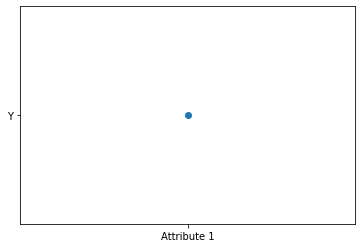

In [28]:
plt.scatter("Attribute 1","Y")

In [3]:
df.shape

(3111, 80)

In [4]:
X = df.iloc[:, 0:79].values 
y = df.iloc[:, 79].values 

In [5]:
ydf=df.iloc[:,79]
ydf

0       1
1       0
2       0
3       1
4       0
       ..
3106    0
3107    0
3108    0
3109    0
3110    0
Name: Y, Length: 3111, dtype: int64

# PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

In [7]:
principalDf

,PCA1,PCA2
0,2.313702,0.046061
1,2.513014,0.680143
2,-0.309059,0.296030
3,2.561618,0.788397
4,-0.666323,0.383130
...,...,...
3106,-0.910487,-0.177910
3107,-0.911721,-0.128839
3108,-0.911721,-0.128839
3109,-0.911721,-0.128839


In [8]:
finalDf = pd.concat([principalDf, ydf], axis = 1)
finalDf

,PCA1,PCA2,Y
0,2.313702,0.046061,1
1,2.513014,0.680143,0
2,-0.309059,0.296030,0
3,2.561618,0.788397,1
4,-0.666323,0.383130,0
...,...,...,...
3106,-0.910487,-0.177910,0
3107,-0.911721,-0.128839,0
3108,-0.911721,-0.128839,0
3109,-0.911721,-0.128839,0


In [9]:
# Importing Libraries for Modelling.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
X=principalDf
y=ydf

In [11]:
#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Using KMN

In [12]:
# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Accuracy Score: 0.9775280898876404
Confusion matrix 
 [[604   5]
 [  9   5]]
Classification 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       609
           1       0.50      0.36      0.42        14

    accuracy                           0.98       623
   macro avg       0.74      0.67      0.70       623
weighted avg       0.97      0.98      0.98       623



# Logistic Regression Accuracy

In [13]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9775280898876404
[[609   0]
 [ 14   0]]


# LR Cohen Kappa Accuracy

In [14]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)

print(cluster)

0.0


# Support Vector Machine Accuracy

In [15]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#Support Vector Machine
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9775280898876404
[[609   0]
 [ 14   0]]


# Gaussian Naive Bayes Accuracy

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9775280898876404
[[609   0]
 [ 14   0]]


# Decision Tree Classifier Accuracy

In [18]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9775280898876404
[[604   5]
 [  9   5]]


# Random Forest Classifier Accuracy

In [20]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9775280898876404
[[609   0]
 [ 10   4]]
